In [1]:
import pandas as pd

In [2]:
data_df = pd.DataFrame(pd.read_csv('Air Quality .csv', index_col = 0))
data_df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:

data_df['datetime'] = pd.to_datetime(data_df[['year', 'month','day', 'hour']])
data_df = data_df.drop(['year', 'month','day', 'hour'], axis = 1)


In [4]:
data_df = data_df[['datetime', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']].iloc[24:].reset_index().drop('No', axis = 1)
data_df[['pm2.5']] = data_df[['pm2.5']].interpolate(method='linear')

In [5]:
data_df.isnull().sum()

datetime    0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
pm2.5       0
dtype: int64

In [6]:
len(data_df)

43800

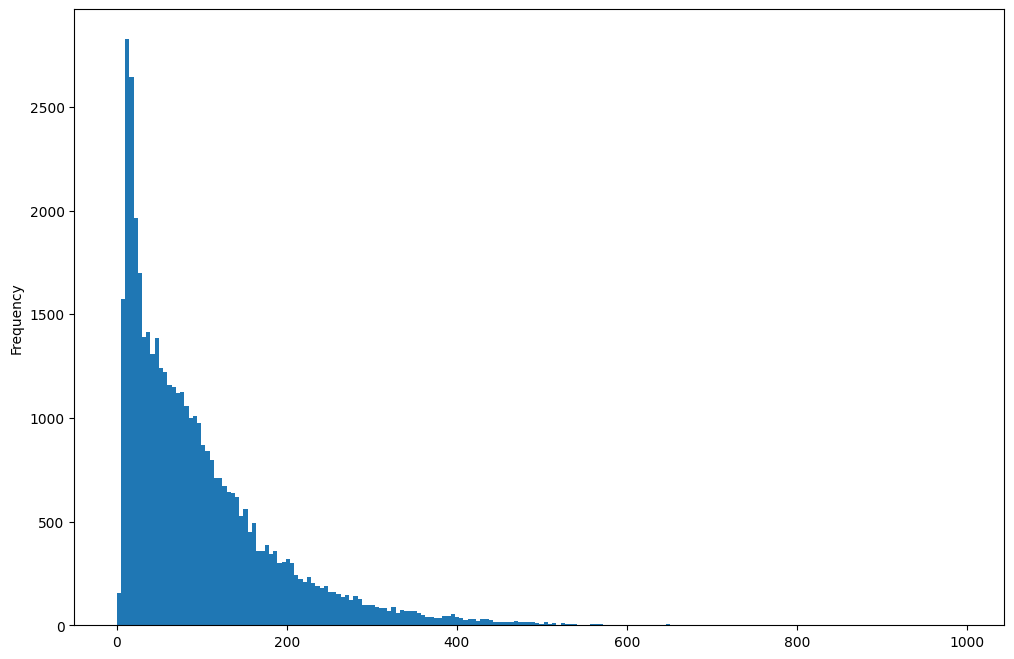

In [12]:
ax = data_df['pm2.5'].plot.hist(bins = 200, figsize = (12,8))

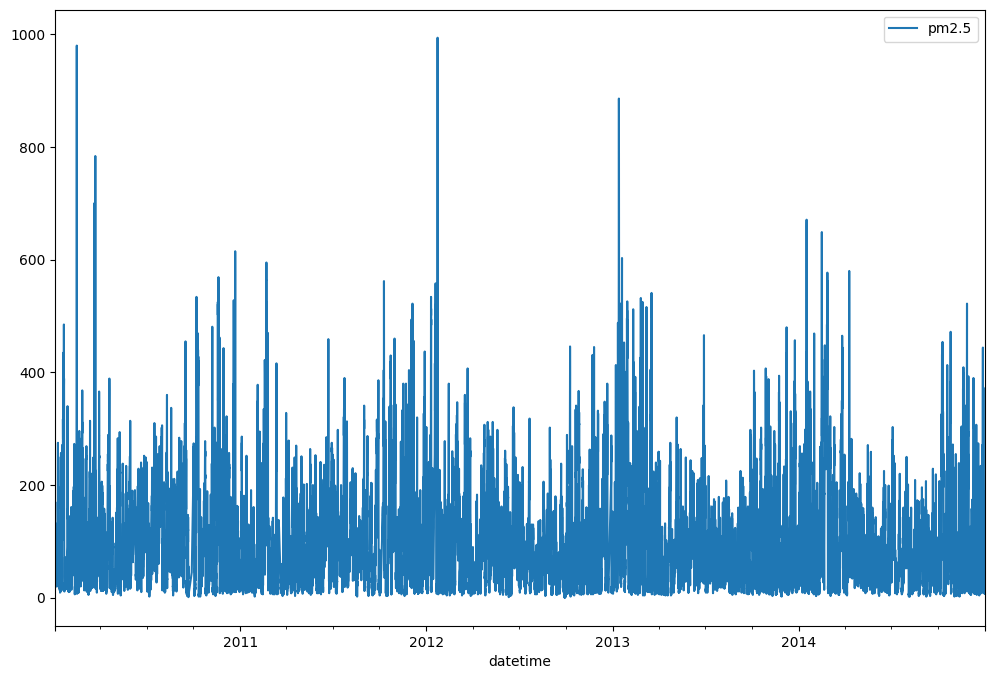

In [9]:
ax = data_df.plot(x = 'datetime', y = 'pm2.5', figsize = (12,8))

In [10]:
data_df[['pm2.5']].mean()

pm2.5    98.244966
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

data_df = data_df.set_index('datetime')
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']], data_df[['pm2.5']], test_size=0.2)

In [14]:
import statsmodels.api as sm
import numpy as np

model = sm.OLS(np.asarray(y_train), np.asarray(X_train))
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.041e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        14:15:12   Log-Likelihood:                     -2.0332e+05
No. Observations:               35040   AIC:                                  4.067e+05
Df Residuals:                   35034   BIC:                                  4.067e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
from sklearn.metrics import mean_squared_error

y_pred = results.predict(np.asarray(X_test))
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

81.10876272207096


In [16]:
data_df = data_df.reset_index()
six_df = pd.DataFrame()
twelve_df = pd.DataFrame()
tf_df = pd.DataFrame()
for i in range(len(data_df)):
    six_df = pd.concat([six_df,pd.DataFrame({'6hr_avg':[sum(data_df['pm2.5'].iloc[i:i+6])/6]}, index = [i+6])])
    twelve_df = pd.concat([twelve_df,pd.DataFrame({'12hr_avg':[sum(data_df['pm2.5'].iloc[i:i+12])/12]}, index = [i+12])])
    tf_df = pd.concat([tf_df,pd.DataFrame({'24hr_avg':[sum(data_df['pm2.5'].iloc[i:i+24])/24]}, index = [i+24])])
    
data_df = pd.merge(data_df, six_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, twelve_df, left_index=True, right_index=True)
data_df = pd.merge(data_df, tf_df, left_index=True, right_index=True)

data_df = pd.merge(data_df,pd.get_dummies(data_df['cbwd']), left_index=True, right_index=True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)
#model = sm.OLS(np.asarray(y_train), np.asarray(X_train))

In [18]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.641
Method:                 Least Squares   F-statistic:                          1.041e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):                        0.00
Time:                        14:16:19   Log-Likelihood:                     -2.0332e+05
No. Observations:               35040   AIC:                                  4.067e+05
Df Residuals:                   35034   BIC:                                  4.067e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
#y_pred = results.predict(np.asarray(X_test))

#mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

81.10876272207096


In [20]:
from sklearn import tree

In [21]:
data_df = data_df.reset_index()
X_train, X_test, y_train, y_test = train_test_split(data_df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir','6hr_avg', '12hr_avg', '24hr_avg','NE','NW','SE']], data_df[['pm2.5']], test_size=0.2)


In [22]:

clf = tree.DecisionTreeRegressor()
clf = clf.fit(np.asarray(X_train), np.asarray(y_train))

In [23]:

y_pred = clf.predict(np.asarray(X_test))


In [24]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

47.91870115091389


In [25]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtest = xgb.DMatrix(X_test, y_test, feature_names=X_test.columns)
dtrain = xgb.DMatrix(X_train, y_train,feature_names=X_train.columns)

param = {'verbosity':1, 
         'objective':'reg:squarederror',   
         'booster':'gblinear',
         'eval_metric' :'rmse',
         'feature_selector': 'cyclic',
         'learning_rate': 1}

evallist = [(dtrain, 'train')]

In [26]:

num_round = 20
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-rmse:58.98602
[1]	train-rmse:46.76755
[2]	train-rmse:41.63069
[3]	train-rmse:40.94012
[4]	train-rmse:40.52369
[5]	train-rmse:40.31710
[6]	train-rmse:40.15033
[7]	train-rmse:39.97510
[8]	train-rmse:39.84018
[9]	train-rmse:39.70623
[10]	train-rmse:39.59971
[11]	train-rmse:39.47562
[12]	train-rmse:39.36896
[13]	train-rmse:39.28189
[14]	train-rmse:39.20536
[15]	train-rmse:39.13907
[16]	train-rmse:39.05065
[17]	train-rmse:38.96704
[18]	train-rmse:38.90992
[19]	train-rmse:38.85279


C:\Users\sourav\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [27]:
y_pred = bst.predict(dtest)

In [28]:
mse = mean_squared_error(np.asarray(y_test), y_pred)
rmse = mse**0.5
print(rmse)

38.34153672971642
